In [1]:
from mystatsfunctions import OLSE,LMoments

import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn

# Ordinary least square estimator (OLSE)

# L-moments (LMoments)

#### comparing L-moments with `scipy.stats.distn.fit`

GEV

In [2]:
## generate multiple samples of the same underlying population:
true_k = -0.1
true_X = 0
true_alph = 1
gev_samples = stats.genextreme(true_k,true_X,true_alph).rvs(100000).reshape(100,1000)

In [3]:
## use LMoments to fit these samples:
lmom = LMoments.gev()
print('L-moments time:')
%time lmom.fit(gev_samples)

## use stats.fit
print('\nMLE time')
%time sp_mle_params = np.array([stats.genextreme.fit(x) for x in gev_samples.T])

L-moments time:
CPU times: user 29.9 ms, sys: 8.52 ms, total: 38.4 ms
Wall time: 38.2 ms

MLE time
CPU times: user 1min 59s, sys: 360 ms, total: 1min 59s
Wall time: 1min 59s


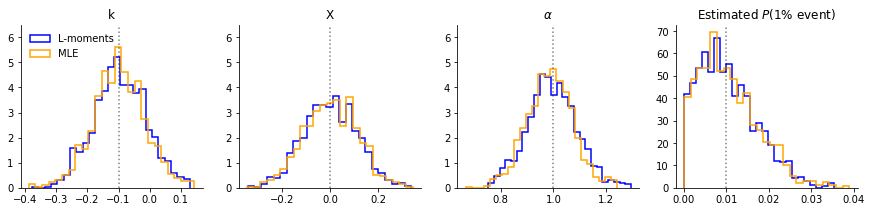

In [4]:
## plot parameter estimates:
fig,ax = plt.subplots(1,4,figsize=(15,3))
param_names = ['k','X',r'$\alpha$']
truth = [true_k,true_X,true_alph]

for i in np.arange(3):
    ax[i].hist(list(lmom.__dict__.values())[i],color='blue',label='L-moments',histtype='step',bins=25,linewidth=1.5,density=True)
    ax[i].hist(sp_mle_params[:,i],color='orange',label='MLE',histtype='step',bins=25,linewidth=1.5,density=True)
    ax[i].axvline(truth[i],color='k',alpha=0.5,ls=':')
    ax[i].set_title(param_names[i])
    ax[i].set_ylim(0,6.5)

    
## and plot the 1 % event estimates:
true_1 = stats.genextreme(true_k,true_X,true_alph).ppf(0.99)
lmom_estimates = 1-lmom.cdf(true_1)
sp_mle_estimates = 1-sp.stats.genextreme(*sp_mle_params.T).cdf(true_1)

ax[3].hist(lmom_estimates,color='blue',label='L-moments',histtype='step',bins=25,linewidth=1.5,density=True)
ax[3].hist(sp_mle_estimates,color='orange',label='MLE',histtype='step',bins=25,linewidth=1.5,density=True)
ax[3].axvline(0.01,color='k',alpha=0.5,ls=':')
ax[3].set_title('Estimated $P$(1% event)')

ax[0].legend(frameon=False,loc='upper left')
sn.despine()

GLo

GPD

norm